### Loading required liabraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix



### Loading and creating DataFrame

In [3]:
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [4]:
null_values= df.isnull().sum().sum()
print('Number of missing values is: ',null_values)
null = df[df.salary.isnull()]
null

Number of missing values is:  1


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


### Filling null value with the mean

In [5]:
df['salary'].fillna(df['salary'].mean(),inplace = True)
df = df.drop_duplicates()



### 1. Splitting the data set to training and testing

In [6]:

train_x, test_x, train_y, test_y = train_test_split(df, df.salary, test_size=0.3, random_state=100)
train_x.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
477,39574.00000,1,15,9,0.80,1,0,2,0,3,43
75,41483.00000,1,5,2,0.93,1,0,2,1,3,1
462,40636.00000,0,12,11,0.88,1,0,1,0,4,30
254,70101.78125,0,23,16,0.89,1,0,3,1,2,0
84,39024.00000,2,7,0,0.99,1,0,2,1,3,0



# Hypothesis Testing¶
- Null Hypothesis: There is no relationship that exists between salary and all the features in the dataset.
- Alternate Hypothesis: There exists a linear relationship between salary and some of the features in the dataset.
### We are testing to validate if there is a relationship that exists between salary and years worked, with a significance level of 5%.

### Looking at feautures that are highly correlated with salary

In [7]:
data_corr =train_x.corr().iloc[:,0].sort_values()
data_corr

Field         -0.531328
yearsabs      -0.113223
degree         0.047555
otherqual      0.130228
exprior        0.143172
male           0.380671
market         0.416172
yearsrank      0.599571
yearsworked    0.606962
position       0.716896
salary         1.000000
Name: salary, dtype: float64

- From this I can see that position is highly correlated with salary 
- There is a slight corrilation betwwen salary and years ranked.
- There is a slight corrilation betwwen salary and years worked.
- There is also a slight negetive correlation between salary and Field

### Checking for descriptive statistics table

In [8]:
df_new = train_x[['salary','yearsworked', 'yearsrank','position','Field']]


In [9]:
df_new.describe()

,salary,yearsworked,yearsrank,position,Field
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,51607.590936,13.206128,7.217270,2.178273,2.495822
std,12607.848642,9.504005,6.341548,0.816366,1.120833
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40512.000000,4.000000,2.000000,1.000000,1.000000
50%,52172.000000,12.000000,5.000000,2.000000,3.000000
75%,61065.500000,22.000000,12.000000,3.000000,3.000000
max,96156.000000,35.000000,24.000000,3.000000,4.000000


### Creating Histograms for the variables of interest

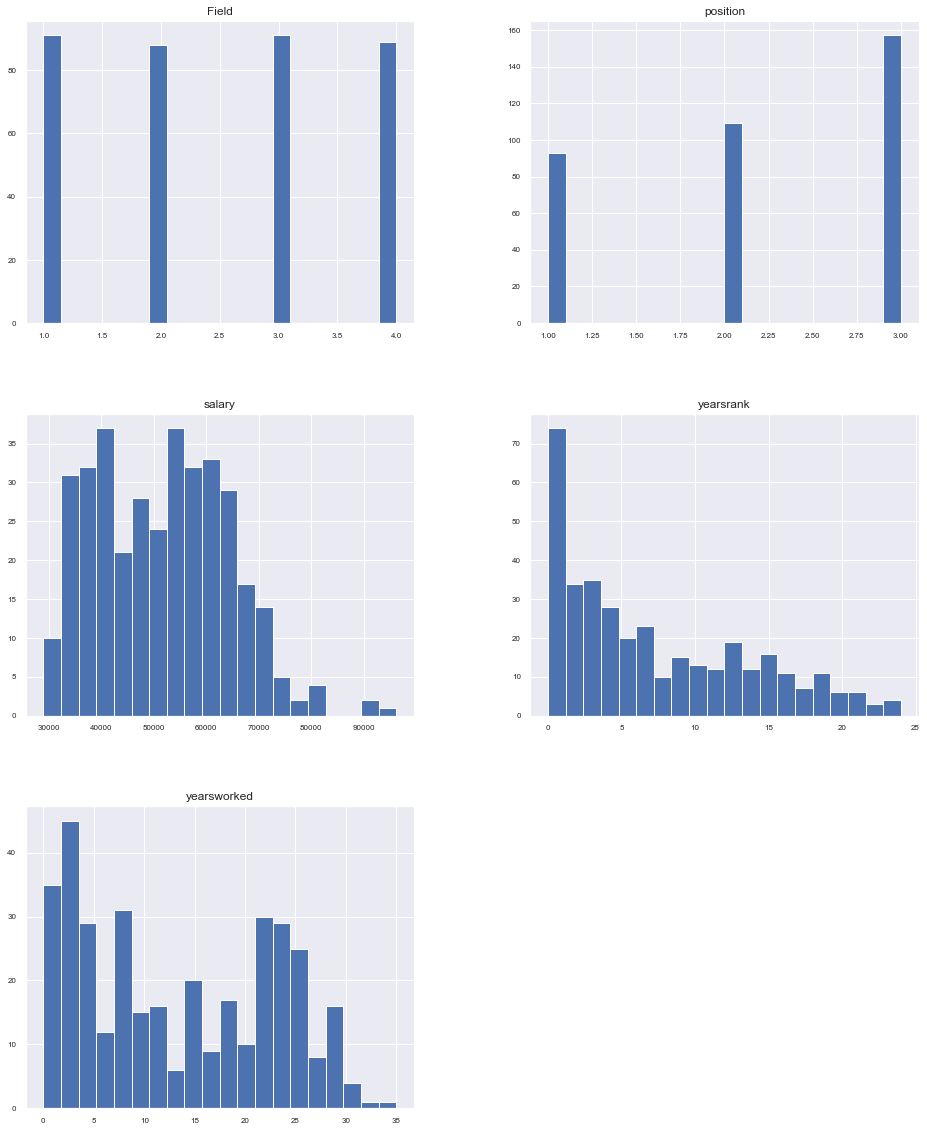

In [11]:
sns.set()
df_new.hist(figsize=(16, 20),bins=20, xlabelsize=8, ylabelsize=8);

## From the above histograms of the features of interest it is clear that Position and Field are categorical data.

 ### Salary
- There are few possible outliers
- The distribution is skewed to the right
- A lot of individuals earn between 33000 dollars & 75000 dollars
### Years worked in this field
- There are possible outliers 
- The distribution is skewed to the right
- A lot of individuals have worked between 0 years & 29 years
### Years worked at current rank
- The distribution is skewed to the right
- There are possible outliers just few of them
- Most individuals have worked at the current rank for years between 0 & 5 years.

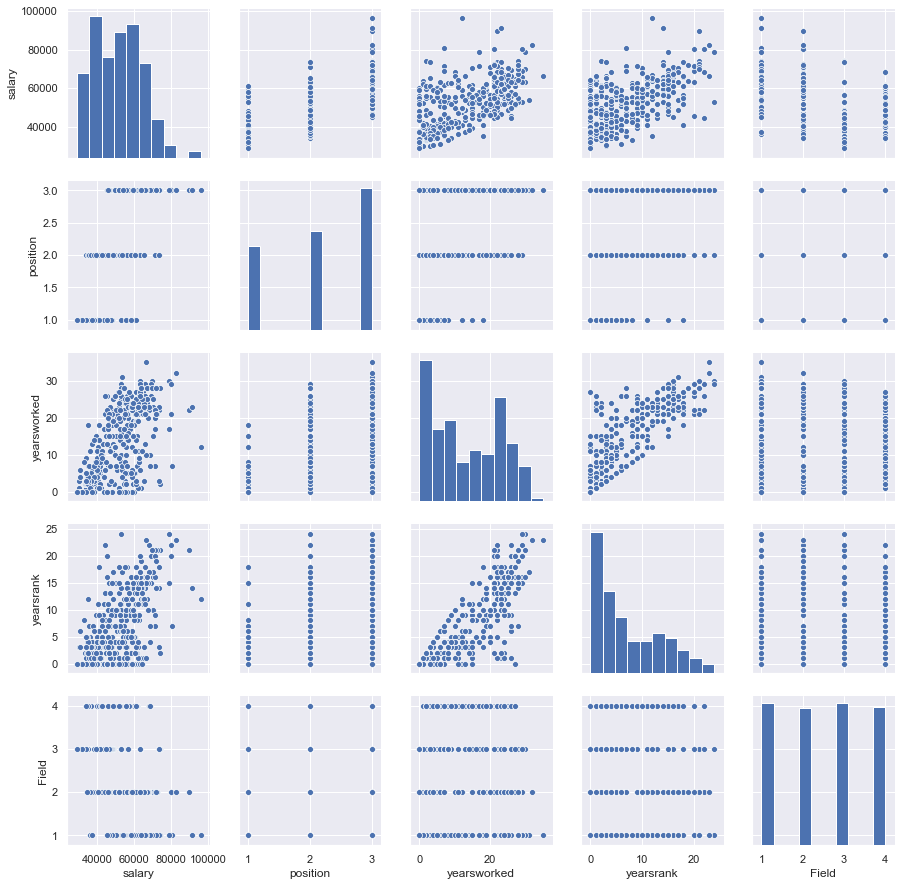

In [17]:
sns.pairplot(df_new[['salary', 'position','yearsworked','yearsrank','Field']])

- After observed the above charts, for Years Worked and Years Rank we reject the null hypothesis reason being that there is a linear relationship among these two variables. Therefore we are selecting these variables as our predictors for the target salary.

### One-hot encode the variable Field into three dummy variables, using HR as the reference category.

In [18]:
field = pd.get_dummies(df_new['Field'])
field.drop(1, inplace=True, axis=1)

new_field = field.rename(columns={2:'Finance',3:'HR',4:'Marketing'})

salary = pd.concat([df_new, new_field] ,axis=1, ignore_index=False)
salary.drop("Field", inplace=True, axis=1)
salary.head()

,salary,yearsworked,yearsrank,position,Finance,HR,Marketing
477,39574.00000,15,9,2,0,1,0
75,41483.00000,5,2,2,0,1,0
462,40636.00000,12,11,1,0,0,1
254,70101.78125,23,16,3,1,0,0
84,39024.00000,7,0,2,0,1,0
